<a href="https://colab.research.google.com/github/Marcu-Loreto/UFG_Estudo_caso_2025/blob/main/malware_seguran%C3%A7a_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importações para análise de dados
import pandas as pd
import numpy as np

# Importações para machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             roc_auc_score, roc_curve, precision_recall_curve,
                             f1_score, precision_score, recall_score)

# Importações para feature selection e redução de dimensionalidade
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, RFE, mutual_info_classif, chi2
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Importações para visualizações
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importações para análise comparativa
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Importações para análise estatística
from scipy import stats
from scipy.stats import chi2_contingency

# Configurações para visualizações
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Bibliotecas importadas com sucesso! Pronto para análise do dataset TUNADROMD.")

Bibliotecas importadas com sucesso! Pronto para análise do dataset TUNADROMD.


In [ ]:
# Carregar o dataset TUNADROMD
tabela = pd.read_csv('/content/drive/MyDrive/EspAgentesInteligentes/aprendizagem_maquina/TUANDROMD.csv')

print(f"Dataset carregado com sucesso! Shape: {tabela.shape}")

# Mostrar distribuição das classes
print("\n=== DISTRIBUIÇÃO DAS CLASSES ===")
print(tabela['Label'].value_counts())
print("\nProporção das classes:")
print(tabela['Label'].value_counts(normalize=True))

# Remover valores nulos
tabela = tabela.dropna()

print("\n Valores nulos removidos")
print("="*40)
tabela.info()


Dataset carregado com sucesso! Shape: (4465, 242)

=== DISTRIBUIÇÃO DAS CLASSES ===
Label
1.0    3565
0.0     899
Name: count, dtype: int64

Proporção das classes:
Label
1.0    0.798611
0.0    0.201389
Name: proportion, dtype: float64

 Valores nulos removidos
<class 'pandas.core.frame.DataFrame'>
Index: 4464 entries, 0 to 4464
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(242)
memory usage: 8.3 MB


In [ ]:
# Balanceamento das classes para proporção 50/50
classe_1 = tabela[tabela['Label'] == 1.0]
classe_0 = tabela[tabela['Label'] == 0.0]

# Oversampling da classe minoritária
classe_0_oversampled = classe_0.sample(len(classe_1),
                      replace=True, random_state=42)

# Dataset balanceado
tabela_balanceada = pd.concat([classe_1, classe_0_oversampled])

print("\n=== DISTRIBUIÇÃO DAS CLASSES (BALANCEADO) ===")
# Mostrar distribuição das classes em formato de tabela pandas
distribuicao_classes_balanceada = tabela_balanceada['Label'].value_counts().reset_index()
distribuicao_classes_balanceada.columns = ['Label', 'Count']
print("Distribuição das classes:")
display(distribuicao_classes_balanceada)

print("\nProporção das classes:")
proporcao_classes_balanceada = tabela_balanceada['Label'].value_counts(normalize=True).reset_index()
proporcao_classes_balanceada.columns = ['Label', 'Proportion']
display(proporcao_classes_balanceada)


print("\n Dataset balanceado com sucesso!")
tabela_balanceada.info()


=== DISTRIBUIÇÃO DAS CLASSES (BALANCEADO) ===
Distribuição das classes:


,Label,Count
0,1.0,3565
1,0.0,3565



Proporção das classes:


,Label,Proportion
0,1.0,0.5
1,0.0,0.5



 Dataset balanceado com sucesso!
<class 'pandas.core.frame.DataFrame'>
Index: 7130 entries, 0 to 2555
Columns: 242 entries, ACCESS_ALL_DOWNLOADS to Label
dtypes: float64(242)
memory usage: 13.2 MB


In [ ]:
# Dividir os dados em treino e teste
y = tabela['Label']
x = tabela.drop(columns=['Label'])

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print(f"Treino: {x_train.shape}, Teste: {x_test.shape}")

Treino: (3571, 241), Teste: (893, 241)


In [ ]:
# Treinar modelo de Regressão Logística
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(x_train, y_train)

# Predições
y_pred_lr = model_lr.predict(x_test)

# Resultados
print("\n=== RESULTADOS - Regressão Logística ===")
# Criar tabela de métricas em pandas DataFrame
metrics_lr = pd.DataFrame({
    "Métrica": ["Acurácia", "Precisão", "Recall", "F1-Score"],
    "Valor": [
        accuracy_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr)
    ]
})
display(metrics_lr.round(4))


=== RESULTADOS - Regressão Logística ===


,Métrica,Valor
0,Acurácia,0.9843
1,Precisão,0.9944
2,Recall,0.9861
3,F1-Score,0.9902


In [ ]:
print("\nRelatório de Classificação:")
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
df_report_lr = pd.DataFrame(report_lr).transpose()
display(df_report_lr)


Relatório de Classificação:


,precision,recall,f1-score,support
0.0,0.944444,0.977011,0.960452,174.000000
1.0,0.994390,0.986092,0.990223,719.000000
accuracy,0.984323,0.984323,0.984323,0.984323
macro avg,0.969417,0.981552,0.975338,893.000000
weighted avg,0.984658,0.984323,0.984423,893.000000


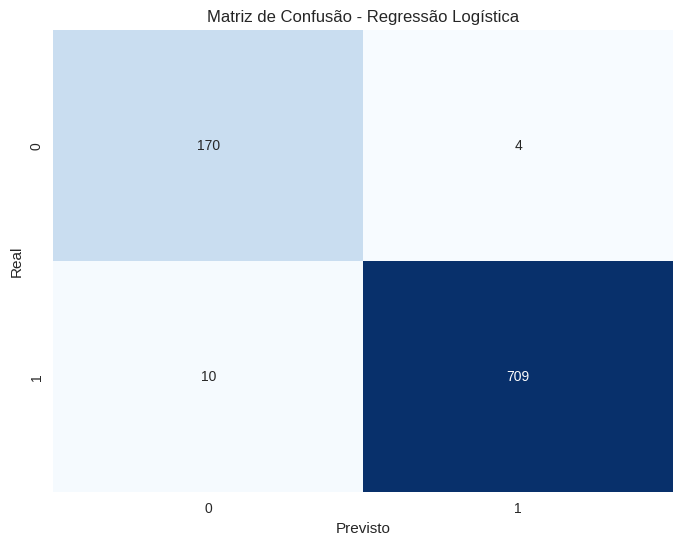

In [ ]:
# Visualizar Matriz de Confusão para Regressão Logística
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [ ]:
# Treinar modelo Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)

# Predições
y_pred_rf = model_rf.predict(x_test)

# tabela de métricas em pandas DataFrame
metrics_rf =  pd.DataFrame({
    "Métrica": ["Acurácia", "Precisão", "Recall", "F1-Score"],
    "Valor": [
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf)]
})
display(metrics_rf.round(4))


print("\nRelatório de Classificação:")
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
df_report_rf = pd.DataFrame(report_rf).transpose()
display(df_report_rf)

,Métrica,Valor
0,Acurácia,0.9944
1,Precisão,0.9958
2,Recall,0.9972
3,F1-Score,0.9965



Relatório de Classificação:


,precision,recall,f1-score,support
0.0,0.988439,0.982759,0.985591,174.000000
1.0,0.995833,0.997218,0.996525,719.000000
accuracy,0.994401,0.994401,0.994401,0.994401
macro avg,0.992136,0.989988,0.991058,893.000000
weighted avg,0.994393,0.994401,0.994395,893.000000


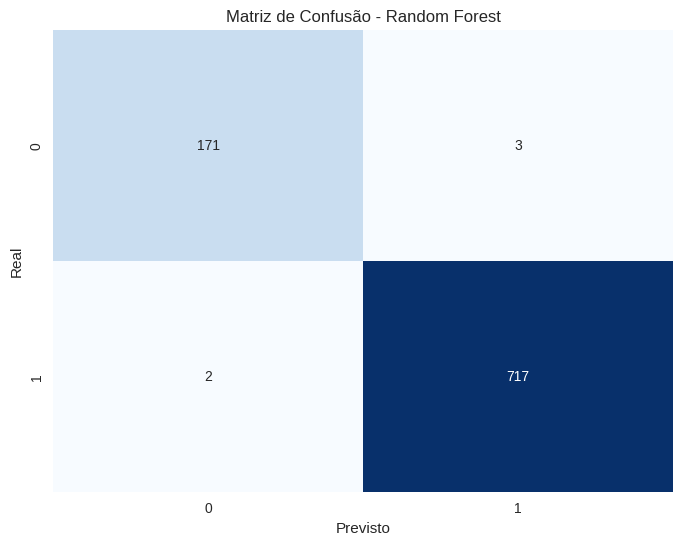

In [ ]:
# Visualizar Matriz de Confusão para Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [ ]:
# Treinar modelo Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(x_train, y_train)

# Predições
y_pred_gb = model_gb.predict(x_test)

# Criar tabela de métricas em pandas DataFrame
metrics_gb = pd.DataFrame({
    "Métrica": ["Acurácia", "Precisão", "Recall", "F1-Score"],
    "Valor": [
        accuracy_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_gb)
    ]
})
display(metrics_gb.round(4))


,Métrica,Valor
0,Acurácia,0.9866
1,Precisão,0.9876
2,Recall,0.9958
3,F1-Score,0.9917


In [ ]:
print("\nRelatório de Classificação - Gradient Boosting:")
report_gb = classification_report(y_test, y_pred_gb, output_dict=True)
df_report_gb = pd.DataFrame(report_gb).transpose()
display(df_report_gb)


Relatório de Classificação - Gradient Boosting:


,precision,recall,f1-score,support
0.0,0.982143,0.948276,0.964912,174.000000
1.0,0.987586,0.995828,0.991690,719.000000
accuracy,0.986562,0.986562,0.986562,0.986562
macro avg,0.984865,0.972052,0.978301,893.000000
weighted avg,0.986526,0.986562,0.986472,893.000000


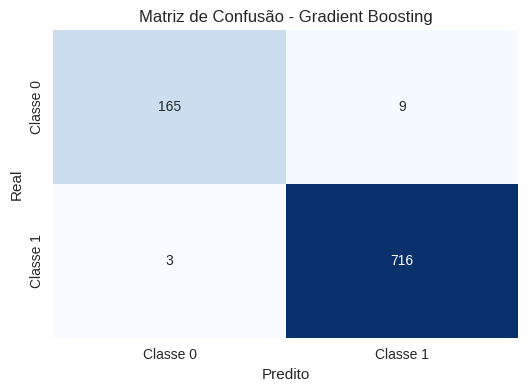

In [ ]:
# Matriz de confusão Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Gradient Boosting")
plt.show()

,Acurácia,Precisão,Recall,F1-Score
Regressão Logística,0.9843,0.9944,0.9861,0.9902
Random Forest,0.9944,0.9958,0.9972,0.9965
Gradient Boosting,0.9866,0.9876,0.9958,0.9917


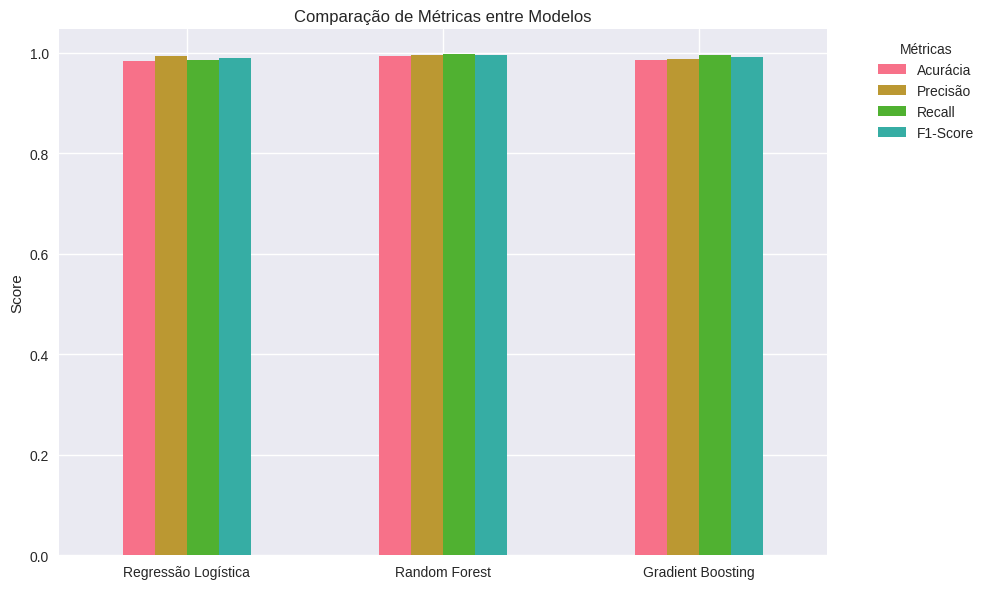

In [ ]:
# Consolidar resultados em dicionário
results = {
    "Regressão Logística": {
        "Acurácia": accuracy_score(y_test, y_pred_lr),
        "Precisão": precision_score(y_test, y_pred_lr),
        "Recall": recall_score(y_test, y_pred_lr),
        "F1-Score": f1_score(y_test, y_pred_lr)
    },
    "Random Forest": {
        "Acurácia": accuracy_score(y_test, y_pred_rf),
        "Precisão": precision_score(y_test, y_pred_rf),
        "Recall": recall_score(y_test, y_pred_rf),
        "F1-Score": f1_score(y_test, y_pred_rf)
    },
    "Gradient Boosting": {
        "Acurácia": accuracy_score(y_test, y_pred_gb),
        "Precisão": precision_score(y_test, y_pred_gb),
        "Recall": recall_score(y_test, y_pred_gb),
        "F1-Score": f1_score(y_test, y_pred_gb)
    }
}

# Criar DataFrame
comparison_df = pd.DataFrame(results).T
display(comparison_df.round(4))

# Melhor modelo por métrica
best_models = {}
for metric in comparison_df.columns:
    best_model = comparison_df[metric].idxmax()
    best_score = comparison_df[metric].max()
    best_models[metric] = (best_model, best_score)



# Gráfico comparativo das métricas
comparison_df.plot(kind="bar", figsize=(10,6))
plt.title("Comparação de Métricas entre Modelos")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Métricas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Shape original: (7130, 241)
Shape após PCA: (7130, 66)
Número de componentes PCA: 66
Variância explicada: 0.9501


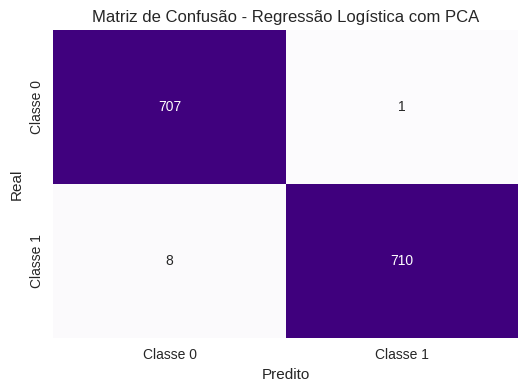

,Métrica,Valor
0,Acurácia,0.9937
1,Precisão,0.9986
2,Recall,0.9889
3,F1-Score,0.9937


In [ ]:
# Separar variáveis do dataset balanceado
y_balanced = tabela_balanceada['Label']
x_balanced = tabela_balanceada.drop(columns=['Label'])

# Normalizar os dados antes do PCA
scaler = StandardScaler()
x_balanced_scaled = scaler.fit_transform(x_balanced)

# Aplicar PCA para manter 95% da variância
pca = PCA(n_components=0.95)
x_balanced_pca = pca.fit_transform(x_balanced_scaled)

print(f"Shape original: {x_balanced.shape}")
print(f"Shape após PCA: {x_balanced_pca.shape}")
print(f"Número de componentes PCA: {pca.n_components_}")
print(f"Variância explicada: {pca.explained_variance_ratio_.sum():.4f}")

# Dividir dados balanceados com PCA
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(
    x_balanced_pca, y_balanced, test_size=0.2, random_state=42
)

# Treinar Regressão Logística com PCA
model_lr_pca = LogisticRegression(random_state=42, max_iter=1000)
model_lr_pca.fit(x_train_pca, y_train_pca)

# Predições
y_pred_lr_pca = model_lr_pca.predict(x_test_pca)

# Matriz de confusão
cm_lr_pca = confusion_matrix(y_test_pca, y_pred_lr_pca)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr_pca, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística com PCA")
plt.show()

# Tabela de métricas
metrics_lr_pca = pd.DataFrame({
    "Métrica": ["Acurácia", "Precisão", "Recall", "F1-Score"],
    "Valor": [
        accuracy_score(y_test_pca, y_pred_lr_pca),
        precision_score(y_test_pca, y_pred_lr_pca),
        recall_score(y_test_pca, y_pred_lr_pca),
        f1_score(y_test_pca, y_pred_lr_pca)
    ]
})
display(metrics_lr_pca.round(4))


,Sem PCA,Com PCA
Acurácia,0.9843,0.9937
Precisão,0.9944,0.9986
Recall,0.9861,0.9889
F1-Score,0.9902,0.9937


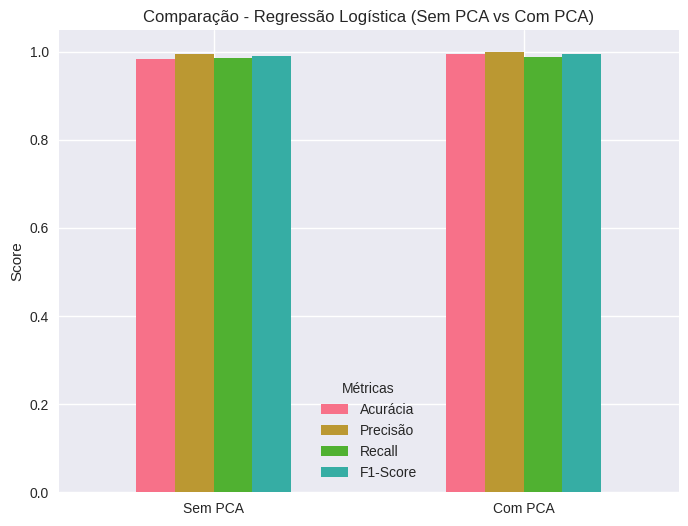

In [ ]:
# Comparação entre Regressão Logística SEM PCA e COM PCA

# Resultados sem PCA (já calculados anteriormente)
results_lr = {
    "Acurácia": accuracy_score(y_test, y_pred_lr),
    "Precisão": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1-Score": f1_score(y_test, y_pred_lr)
}

# Resultados com PCA
results_lr_pca = {
    "Acurácia": accuracy_score(y_test_pca, y_pred_lr_pca),
    "Precisão": precision_score(y_test_pca, y_pred_lr_pca),
    "Recall": recall_score(y_test_pca, y_pred_lr_pca),
    "F1-Score": f1_score(y_test_pca, y_pred_lr_pca)
}

# DataFrame comparativo
comparison_lr = pd.DataFrame({
    "Sem PCA": results_lr,
    "Com PCA": results_lr_pca
})
display(comparison_lr.round(4))

# Gráfico comparativo
comparison_lr.T.plot(kind="bar", figsize=(8,6))
plt.title("Comparação - Regressão Logística (Sem PCA vs Com PCA)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Métricas")
plt.show()


In [ ]:
# Análise da redução de dimensionalidade
dim_original = x_balanced.shape[1]
dim_pca = x_balanced_pca.shape[1]
reducao_percentual = round(((dim_original - dim_pca) / dim_original) * 100, 2)
variancia_explicada = round(pca.explained_variance_ratio_.sum(), 2)


# Resumo em DataFrame
dim_summary = pd.DataFrame({
    "Característica": ["Dimensões Originais", "Dimensões PCA", "Redução (%)", "Variância Explicada"],
    "Valor": [dim_original, dim_pca, reducao_percentual, variancia_explicada]
})
display(dim_summary)


,Característica,Valor
0,Dimensões Originais,241.00
1,Dimensões PCA,66.00
2,Redução (%),72.61
3,Variância Explicada,0.95
